In [14]:
import funcs
import cv2 as cv
import main
import Information_extraxion as ie
import matplotlib.pyplot as plt
import pandas as pd

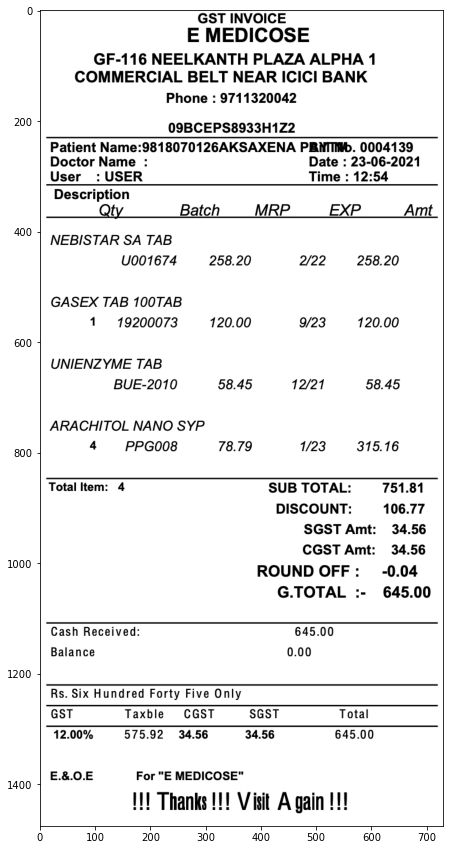

In [5]:
img = cv.imread("img.png")

figure = plt.figure(figsize = (15,15))
plt.imshow(img)

# Pre- Processing

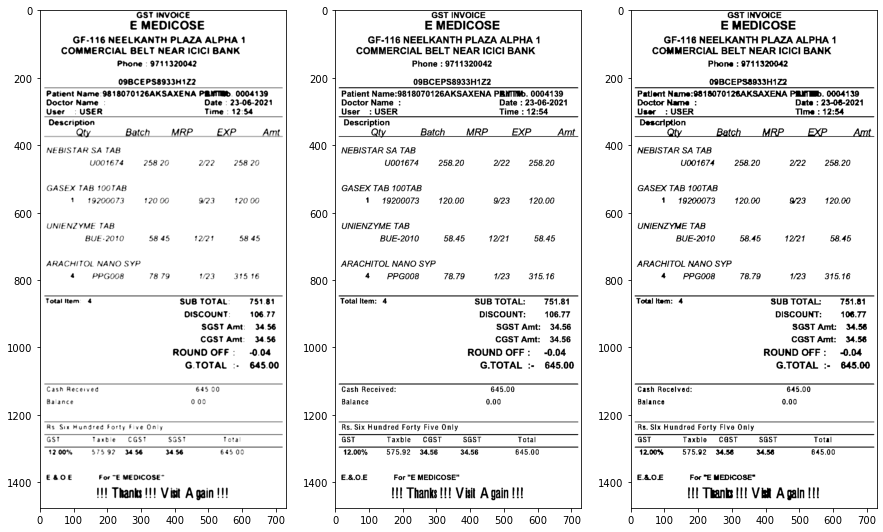

In [7]:
blur, thres, ed = funcs.pre_process(img)

fig = plt.figure(3, figsize=(15,15))

fig.add_subplot(1,3, 1)
plt.imshow(blur, cmap= "gray")


fig.add_subplot(1,3,2)
plt.imshow(thres, "gray")

fig.add_subplot(1,3,3)
plt.imshow(ed, "gray")

plt.show()

# Text Extraction with OCR (tesserocr)

In [8]:

text, bbox = funcs.text_extraction(ed)
print(text)

GST INVOICE
E MEDICOSE
GF-116 NEELKANTH PLAZA ALPHA 1
COMMERCIAL BELT NEAR ICICI BANK
Phone : 9711320042
09BCEPS8933H1Z2
Patlent Name:9818070126AKSAXENA PRINTED. 0004139
Doctor Name : Date : 23-06-2021
User: USER Time : 12:54
Description
—__@fy Batch MRP EXP Amt
NEBISTAR SA TAB
U001674 258.20 2/22 258.20
GASEX TAB 100TAB
1 19200073 120.00 9/23 120.00
UNIENZYME TAB
BUE-2010 58.45 12/21 58.45
ARACHITOL NANO SYP
4 PPGOOS8 78.79 23 315.16
Total Item: 4 SUB TOTAL: 751.81
DISCOUNT: 106.77
SGSTAmt 34.56
CGST Amt: 44.56
ROUND OFF: -0.04
G.TOTAL :- 645.00
Cash Recelved: 645.00
Balance 0.00
Rs. Slx Hundred Forty Five Only
@ST Taxble C@ST SGST Total
12.00% 575.92 34.56 M436 645.00
E&O£ For "E MEDICOSE™
UN Tikarns tt Vit A gain It!



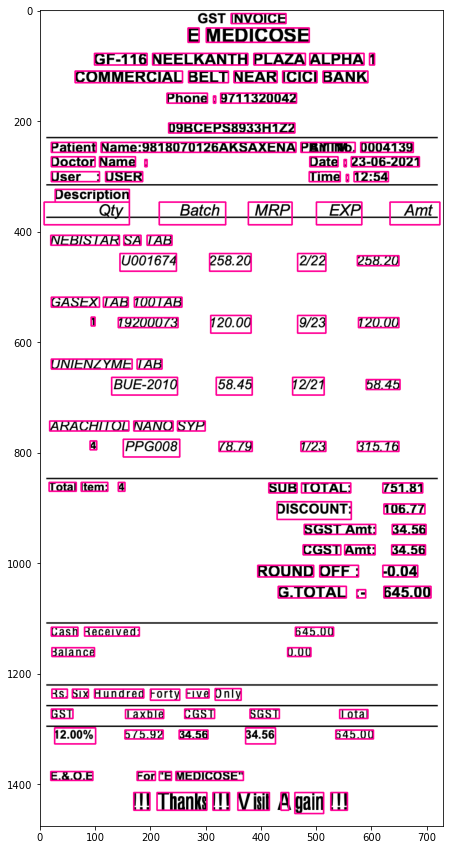

In [24]:
for i in bbox:
  ima = cv.rectangle(img, (i[0], i[1]), (i[2], i[3]), (255, 0, 150), thickness =2)

f = plt.figure(figsize = (15,15))
im_1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [20]:
# Information extraction with regular expression matching

c = ie.regex()
c_dict = c.info_extract(text)
print(c_dict)

{'Phone Number': ['9711320042'], 'Date': ['23-06-2021'], 'Patient Name': ['9818070126AKSAXENA'], 'Time': ['12:54'], 'total_items': ['4'], 'sub_total': ['751.81'], 'discount': ['106.77'], 'sgst': ['34.56'], 'cgst': ['44.56'], 'round_off': ['-0.04'], 'grand_total': ['645.00'], 'balance': ['0.00'], 'cash_r': 645.0}


In [15]:
# Items
items = main.item_extraction(text)
print(items)

['NEBISTAR SA TAB', 'U001674 258.20 2/22 258.20', 'GASEX TAB 100TAB', '1 19200073 120.00 9/23 120.00', 'UNIENZYME TAB', 'BUE-2010 58.45 12/21 58.45', 'ARACHITOL NANO SYP', '4 PPGOOS8 78.79 23 315.16']


# Sorting information for pandas df

In [17]:
dscrpt = []

for i in range(0,len(items),2):
    dc = dict()
    dc["Product"] = items[i]
    dtls = items[i+1].split(" ")
    if len(dtls) == 5:
        dc["Qty"] = dtls[0]
        dc["Batch"] = dtls[1]
        dc["MRP"] = dtls[2]
        dc["Exp"] = dtls[3]
        dc["Amt"] = dtls[4]
    else:
        dc["Qty"] = None
        dc["Batch"] = dtls[0]
        dc["MRP"] = dtls[1]
        dc["Exp"] = dtls[2]
        dc["Amt"] = dtls[3]


    dscrpt.append(dc)

In [19]:
dscrpt

[{'Product': 'NEBISTAR SA TAB',
  'Qty': None,
  'Batch': 'U001674',
  'MRP': '258.20',
  'Exp': '2/22',
  'Amt': '258.20'},
 {'Product': 'GASEX TAB 100TAB',
  'Qty': '1',
  'Batch': '19200073',
  'MRP': '120.00',
  'Exp': '9/23',
  'Amt': '120.00'},
 {'Product': 'UNIENZYME TAB',
  'Qty': None,
  'Batch': 'BUE-2010',
  'MRP': '58.45',
  'Exp': '12/21',
  'Amt': '58.45'},
 {'Product': 'ARACHITOL NANO SYP',
  'Qty': '4',
  'Batch': 'PPGOOS8',
  'MRP': '78.79',
  'Exp': '23',
  'Amt': '315.16'}]

In [21]:
d = {}
for i in dscrpt.copy():
    name = i["Product"]
    del i["Product"]
    d[name] = i

# Items
d_frame = pd.DataFrame(d,)

discount = c_dict["discount"]
sub_total = c_dict["sub_total"]
CGST = c_dict["cgst"]
SGST = c_dict["sgst"]
round = c_dict["round_off"]
total_match = c_dict["grand_total"]

# Total
total = {"Items" : [int(len(dscrpt))] ,"Sub Total" : [float(sub_total[0])],"Discount": [float(discount[0])], "CGST": [float(CGST[0])],
              "SGST": [float(SGST[0])], "ROUND OFF": [float(round[0])],"G. Total": [float(total_match[0])]}
t_frame = pd.DataFrame(total)

In [22]:
t_frame

,Items,Sub Total,Discount,CGST,SGST,ROUND OFF,G. Total
0,4,751.81,106.77,44.56,34.56,-0.04,645.0


In [23]:
d_frame

,NEBISTAR SA TAB,GASEX TAB 100TAB,UNIENZYME TAB,ARACHITOL NANO SYP
Qty,None,1,None,4
Batch,U001674,19200073,BUE-2010,PPGOOS8
MRP,258.20,120.00,58.45,78.79
Exp,2/22,9/23,12/21,23
Amt,258.20,120.00,58.45,315.16
